# 1.0 安裝套件

In [573]:
# !pip install matplotlib
# !pip install yfinance
# !pip install pandas
# !pip install numpy


In [574]:
# !pip install pyarrow

In [670]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from pandas.tseries.offsets import MonthBegin, MonthEnd
warnings.simplefilter(action='ignore', category=Warning)
# pd.set_option('display.float_format', lambda x: '%.3f' % x)

# 2.0 資料前處理    

- 使用 pandas 的 read_feather 讀取 feather 檔案。

In [576]:
df = pd.read_feather('課堂練習.feather')
df

,證券代碼,年月日,開盤價(元),最高價(元),最低價(元),收盤價(元),成交量(千股),成交值(千元),報酬率％,週轉率％,...,現金股利率,股價漲跌(元),高低價差%,次日開盤參考價,次日漲停價,次日跌停價,注意股票(A),處置股票(D),全額交割(Y),市場別
0,1101 台泥,2019-01-30,23.680,23.871,23.521,23.776,12214,454594,0.674,0.239,...,3.339,0.250,1.482,37.350,41.050,33.650,NaN,NaN,NaN,TSE
1,1102 亞泥,2019-01-30,25.877,26.308,25.625,26.201,9633,349158,1.250,0.287,...,3.292,0.450,2.639,36.450,40.050,32.850,NaN,NaN,NaN,TSE
2,1103 嘉泥,2019-01-30,10.668,10.668,10.591,10.668,300,4140,0.730,0.039,...,3.623,0.100,0.730,13.800,15.150,12.450,NaN,NaN,NaN,TSE
3,1104 環泥,2019-01-30,14.373,14.561,14.373,14.561,92,1767,1.047,0.014,...,5.700,0.200,1.309,19.300,21.200,17.400,NaN,NaN,NaN,TSE
4,1108 幸福,2019-01-30,6.561,6.596,6.543,6.596,273,2027,0.269,0.068,...,0.000,0.020,0.807,7.460,8.200,6.720,NaN,NaN,NaN,TSE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2122684,9951 皇田,2023-08-23,73.300,75.100,73.300,74.600,114,8536,1.773,0.152,...,4.424,1.300,2.456,74.600,82.000,67.200,NaN,NaN,NaN,OTC
2122685,9955 佳龍,2023-08-23,21.850,22.050,21.850,21.900,143,3146,0.229,0.139,...,0.000,0.050,0.915,21.900,24.050,19.750,NaN,NaN,NaN,TSE
2122686,9958 世紀鋼,2023-08-23,138.000,143.500,138.000,142.000,2536,359064,2.899,1.075,...,0.348,4.000,3.986,142.000,156.000,128.000,NaN,NaN,NaN,TSE
2122687,9960 邁達康,2023-08-23,26.350,26.600,26.300,26.400,7,184,0.000,0.021,...,8.333,0.000,1.136,26.400,29.000,23.800,NaN,NaN,NaN,OTC


## 2.1 查看數據結構

使用 head()、info()、describe()等方法來快速查看數據的前幾行、結構信息和統計摘要。

In [577]:
# 查看前 5 行
df.head(5)

# 查看後 5 行
df.tail(5)

,證券代碼,年月日,開盤價(元),最高價(元),最低價(元),收盤價(元),成交量(千股),成交值(千元),報酬率％,週轉率％,...,現金股利率,股價漲跌(元),高低價差%,次日開盤參考價,次日漲停價,次日跌停價,注意股票(A),處置股票(D),全額交割(Y),市場別
2122684,9951 皇田,2023-08-23,73.300,75.100,73.300,74.600,114,8536,1.773,0.152,...,4.424,1.300,2.456,74.600,82.000,67.200,NaN,NaN,NaN,OTC
2122685,9955 佳龍,2023-08-23,21.850,22.050,21.850,21.900,143,3146,0.229,0.139,...,0.000,0.050,0.915,21.900,24.050,19.750,NaN,NaN,NaN,TSE
2122686,9958 世紀鋼,2023-08-23,138.000,143.500,138.000,142.000,2536,359064,2.899,1.075,...,0.348,4.000,3.986,142.000,156.000,128.000,NaN,NaN,NaN,TSE
2122687,9960 邁達康,2023-08-23,26.350,26.600,26.300,26.400,7,184,0.000,0.021,...,8.333,0.000,1.136,26.400,29.000,23.800,NaN,NaN,NaN,OTC
2122688,9962 有益,2023-08-23,16.850,16.900,16.650,16.900,122,2068,0.595,0.135,...,10.651,0.100,1.488,16.900,18.550,15.250,NaN,NaN,NaN,OTC


In [578]:
# 篩選符合特定條件的資料行
df[df['證券代碼'] == '1101 台泥']

,證券代碼,年月日,開盤價(元),最高價(元),最低價(元),收盤價(元),成交量(千股),成交值(千元),報酬率％,週轉率％,...,現金股利率,股價漲跌(元),高低價差%,次日開盤參考價,次日漲停價,次日跌停價,注意股票(A),處置股票(D),全額交割(Y),市場別
0,1101 台泥,2019-01-30,23.680,23.871,23.521,23.776,12214,454594,0.674,0.239,...,3.339,0.250,1.482,37.350,41.050,33.650,NaN,NaN,NaN,TSE
1763,1101 台泥,2019-01-29,23.553,23.617,23.362,23.617,10057,371981,0.270,0.197,...,3.360,0.100,1.081,37.100,40.800,33.400,NaN,NaN,NaN,TSE
3526,1101 台泥,2019-01-28,23.394,23.553,23.362,23.553,13642,503258,1.093,0.267,...,3.370,0.400,0.820,37.000,40.700,33.300,NaN,NaN,NaN,TSE
5289,1101 台泥,2019-01-25,23.171,23.394,23.108,23.298,11808,431875,0.549,0.231,...,3.410,0.200,1.236,36.600,40.250,32.950,NaN,NaN,NaN,TSE
7053,1101 台泥,2019-01-24,23.203,23.267,23.012,23.171,7992,290662,-0.137,0.156,...,3.430,-0.050,1.097,36.400,40.000,32.800,NaN,NaN,NaN,TSE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2113697,1101 台泥,2023-08-17,36.000,36.050,35.400,35.650,41929,1451706,-1.110,0.586,...,1.402,-0.400,1.803,35.650,39.200,32.100,NaN,NaN,NaN,TSE
2115495,1101 台泥,2023-08-18,35.800,35.800,35.100,35.150,30753,1087997,-1.403,0.430,...,1.422,-0.500,1.964,35.150,38.650,31.650,NaN,NaN,NaN,TSE
2117293,1101 台泥,2023-08-21,35.000,35.450,35.000,35.400,15868,559417,0.711,0.222,...,1.412,0.250,1.280,35.400,38.900,31.900,NaN,NaN,NaN,TSE
2119091,1101 台泥,2023-08-22,35.550,35.550,35.300,35.400,12160,430418,0.000,0.170,...,1.412,0.000,0.706,35.400,38.900,31.900,NaN,NaN,NaN,TSE


In [579]:
# 查看各欄位資料 (有無缺失值、資料型態)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2122689 entries, 0 to 2122688
Data columns (total 35 columns):
 #   Column      Dtype         
---  ------      -----         
 0   證券代碼        category      
 1   年月日         datetime64[ns]
 2   開盤價(元)      float32       
 3   最高價(元)      float32       
 4   最低價(元)      float32       
 5   收盤價(元)      float32       
 6   成交量(千股)     int32         
 7   成交值(千元)     int32         
 8   報酬率％        float32       
 9   週轉率％        float32       
 10  流通在外股數(千股)  int32         
 11  市值(百萬元)     int32         
 12  最後揭示買價      float32       
 13  最後揭示賣價      float32       
 14  報酬率-Ln      float32       
 15  市值比重％       float32       
 16  成交值比重％      float32       
 17  成交筆數(筆)     int32         
 18  本益比-TSE     float32       
 19  本益比-TEJ     float32       
 20  股價淨值比-TSE   float32       
 21  股價淨值比-TEJ   float32       
 22  漲跌停         category      
 23  股價營收比-TEJ   float32       
 24  股利殖利率-TSE   float32       
 25  現金股利率       float3

In [580]:
# 查看各欄位統計摘要
print(df.describe())

           開盤價(元)      最高價(元)      最低價(元)      收盤價(元)     成交量(千股)  \
count 2122683.000 2122689.000 2122689.000 2122689.000 2122689.000   
mean       55.106      55.912      54.249      55.000    2531.804   
std       122.985     125.128     120.650     122.642   13139.675   
min         0.100       0.110       0.100       0.110       0.000   
25%        16.300      16.500      16.091      16.289      53.000   
50%        28.210      28.550      27.858      28.173     246.000   
75%        54.508      55.178      53.797      54.420    1223.000   
max      4488.230    4540.520    4440.297    4514.375 1281795.000   

            成交值(千元)        報酬率％        週轉率％   流通在外股數(千股)      市值(百萬元)  ...  \
count   2122689.000 2122689.000 2122689.000  2122689.000  2122689.000  ...   
mean     162802.109       0.069       0.873   456084.898    26980.030  ...   
std     1013061.764       2.523       2.725  1628240.831   301459.590  ...   
min           0.000     -74.780       0.000      122.000        2.

## 2.2 處理缺失值(NaN)

應該逐欄、逐列檢查缺失值，並且確定缺失值的原因。幾個可能的原因 :

1. 資料輸入錯誤 : 可以考慮刪除或者修正這些資料。
2. 資料不存在 : 可以考慮刪除，或將缺失值替換為0或其他值。
3. 造成的原因不明 : 可以考慮將缺失值替換為0或者其他值，或者刪除這些資料。

Some thoughts :
- 方法並不是絕對的，需要根據資料特點來決定。
- 比起隨意刪除資料，更危險的是隨意填補缺失值，因為這會產生不真實的資料，可能會導致資料偏差。
- 通常你需要一次次的檢查，確保你的處理方式是合理的。

In [581]:
# 查看各欄位有多少個缺失值
df.isnull().sum()

證券代碼                0
年月日                 0
開盤價(元)              6
最高價(元)              0
最低價(元)              0
收盤價(元)              0
成交量(千股)             0
成交值(千元)             0
報酬率％                0
週轉率％                0
流通在外股數(千股)          0
市值(百萬元)             0
最後揭示買價          12310
最後揭示賣價          31297
報酬率-Ln              0
市值比重％           77066
成交值比重％          77066
成交筆數(筆)             0
本益比-TSE        491069
本益比-TEJ        521874
股價淨值比-TSE       46411
股價淨值比-TEJ       15838
漲跌停           2088946
股價營收比-TEJ       15931
股利殖利率-TSE       46248
現金股利率            1633
股價漲跌(元)           187
高低價差%              35
次日開盤參考價             0
次日漲停價           34874
次日跌停價           34874
注意股票(A)       2095167
處置股票(D)       2107823
全額交割(Y)       2057799
市場別                 0
dtype: int64

In [582]:
# 只顯示有缺失值的欄位
nan_df = df.isnull().sum()
nan_df[nan_df != 0] 

開盤價(元)             6
最後揭示買價         12310
最後揭示賣價         31297
市值比重％          77066
成交值比重％         77066
本益比-TSE       491069
本益比-TEJ       521874
股價淨值比-TSE      46411
股價淨值比-TEJ      15838
漲跌停          2088946
股價營收比-TEJ      15931
股利殖利率-TSE      46248
現金股利率           1633
股價漲跌(元)          187
高低價差%             35
次日漲停價          34874
次日跌停價          34874
注意股票(A)      2095167
處置股票(D)      2107823
全額交割(Y)      2057799
dtype: int64

### Case 1. 刪除開盤價缺失值 

In [583]:
df_open_na = df[df['開盤價(元)'].isnull()].copy()   # 使用copy()以避免改動到原本的dataframe
df_open_na[['證券代碼', '年月日', '市場別']]

# 發現全部的缺失市場別都是REG(興櫃股票)，合理猜測是因為初上興櫃，所以沒有開盤價

,證券代碼,年月日,市場別
264684,6736 碩辣椒,2019-08-15,REG
275234,4570 傑生,2019-08-06,REG
335335,6740 松果購物,2019-10-16,REG
1024373,7452 乂迪生,2021-04-16,REG
1196787,6837 富利康科技,2021-09-29,REG
1232320,6837 富利康科技,2021-09-29,REG


In [584]:
# 檢查猜測是否合理 -> Yes!
df[df['證券代碼'] == df_open_na['證券代碼'].iloc[0]].sort_values(by='年月日').head()

,證券代碼,年月日,開盤價(元),最高價(元),最低價(元),收盤價(元),成交量(千股),成交值(千元),報酬率％,週轉率％,...,現金股利率,股價漲跌(元),高低價差%,次日開盤參考價,次日漲停價,次日跌停價,注意股票(A),處置股票(D),全額交割(Y),市場別
264684,6736 碩辣椒,2019-08-15,NaN,36.290,28.030,36.000,690,21883,9.091,5.907,...,NaN,NaN,NaN,31.700,NaN,NaN,NaN,NaN,NaN,REG
262919,6736 碩辣椒,2019-08-16,36.000,38.930,34.000,38.930,206,7363,8.139,1.764,...,NaN,2.930,15.552,35.720,NaN,NaN,NaN,NaN,NaN,REG
261155,6736 碩辣椒,2019-08-19,38.930,40.120,37.880,39.990,188,7346,2.723,1.610,...,NaN,1.060,6.271,38.890,NaN,NaN,NaN,NaN,NaN,REG
259390,6736 碩辣椒,2019-08-20,39.990,43.370,39.010,41.300,202,8342,3.276,1.730,...,NaN,1.310,11.211,41.120,NaN,NaN,NaN,NaN,NaN,REG
257625,6736 碩辣椒,2019-08-21,41.300,44.220,42.000,43.000,167,7229,4.116,1.430,...,NaN,1.700,5.399,43.050,NaN,NaN,NaN,NaN,NaN,REG


In [585]:
# 刪除只有開盤價為缺失值的行
df.dropna(subset=['開盤價(元)'],inplace=True)

# 檢查一下，這樣是不是真的刪掉了
df.isnull().sum()

證券代碼                0
年月日                 0
開盤價(元)              0
最高價(元)              0
最低價(元)              0
收盤價(元)              0
成交量(千股)             0
成交值(千元)             0
報酬率％                0
週轉率％                0
流通在外股數(千股)          0
市值(百萬元)             0
最後揭示買價          12310
最後揭示賣價          31297
報酬率-Ln              0
市值比重％           77060
成交值比重％          77060
成交筆數(筆)             0
本益比-TSE        491063
本益比-TEJ        521874
股價淨值比-TSE       46405
股價淨值比-TEJ       15838
漲跌停           2088940
股價營收比-TEJ       15931
股利殖利率-TSE       46242
現金股利率            1629
股價漲跌(元)           181
高低價差%              32
次日開盤參考價             0
次日漲停價           34868
次日跌停價           34868
注意股票(A)       2095161
處置股票(D)       2107817
全額交割(Y)       2057793
市場別                 0
dtype: int64

### Case 2. 最後揭示買價缺失值 - 以全部平均值填補

In [586]:
df_bid_na = df[df['最後揭示買價'].isnull()]
df_bid_na[['證券代碼', '年月日', '最後揭示買價']]

,證券代碼,年月日,最後揭示買價
1215,6148 驊宏資,2019-01-30,NaN
1326,6291 沛亨,2019-01-30,NaN
1672,3519 綠能,2019-01-30,NaN
1757,910708 恒大健-DR,2019-01-30,NaN
2873,5455 昇益,2019-01-29,NaN
...,...,...,...
2121735,3675 德微,2023-08-23,NaN
2121743,3689 湧德,2023-08-23,NaN
2121913,4806 昇華,2023-08-23,NaN
2122075,5514 三豐,2023-08-23,NaN


In [587]:
bid_mean = df['最後揭示買價'].mean()
bid_mean

61.435237884521484

In [588]:
df['最後揭示買價_fillna_1'] = df['最後揭示買價'].fillna(bid_mean)

In [589]:
df[df['最後揭示買價_fillna_1'] == bid_mean]

,證券代碼,年月日,開盤價(元),最高價(元),最低價(元),收盤價(元),成交量(千股),成交值(千元),報酬率％,週轉率％,...,股價漲跌(元),高低價差%,次日開盤參考價,次日漲停價,次日跌停價,注意股票(A),處置股票(D),全額交割(Y),市場別,最後揭示買價_fillna_1
1215,6148 驊宏資,2019-01-30,7.684,7.684,7.684,7.684,0,0,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,NaN,NaN,NaN,OTC,61.435
1326,6291 沛亨,2019-01-30,24.059,26.815,22.091,26.815,28,152,9.857,0.055,...,0.550,19.355,6.130,6.740,5.520,NaN,NaN,Y,OTC,61.435
1672,3519 綠能,2019-01-30,5.400,5.400,5.400,5.400,493,2665,-10.000,0.114,...,-0.600,0.000,5.400,5.940,4.860,NaN,D,Y,TSE,61.435
1757,910708 恒大健-DR,2019-01-30,3050.000,3050.000,3050.000,3050.000,0,0,0.000,0.000,...,0.000,0.000,3050.000,3355.000,2745.000,NaN,NaN,NaN,TSE,61.435
2873,5455 昇益,2019-01-29,28.500,28.500,28.500,28.500,0,0,0.000,0.000,...,0.000,0.000,28.500,31.350,25.650,NaN,NaN,Y,OTC,61.435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121735,3675 德微,2023-08-23,320.000,320.000,284.500,284.500,5031,1483363,-9.968,11.324,...,-31.500,11.234,284.500,312.500,256.500,NaN,NaN,NaN,OTC,61.435
2121743,3689 湧德,2023-08-23,61.200,62.900,60.300,60.300,11957,730622,-10.000,15.283,...,-6.700,3.881,60.300,66.300,54.300,NaN,NaN,NaN,OTC,61.435
2121913,4806 昇華,2023-08-23,5.580,5.580,5.580,5.580,0,0,0.000,0.000,...,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,OTC,61.435
2122075,5514 三豐,2023-08-23,20.350,20.500,19.900,20.500,19,385,1.485,0.009,...,0.300,2.970,20.500,22.550,18.450,NaN,NaN,NaN,OTC,61.435


### Case 3. 最後揭示買價缺失值 - 以相同股票前一天的值填補

In [590]:
# 依據股票代號及日期順序排列
df.sort_values(['證券代碼', '年月日'], ascending=True, inplace=True)
df

,證券代碼,年月日,開盤價(元),最高價(元),最低價(元),收盤價(元),成交量(千股),成交值(千元),報酬率％,週轉率％,...,股價漲跌(元),高低價差%,次日開盤參考價,次日漲停價,次日跌停價,注意股票(A),處置股票(D),全額交割(Y),市場別,最後揭示買價_fillna_1
35267,1101 台泥,2019-01-02,22.757,22.885,22.598,22.598,6566,234262,-0.281,0.128,...,-0.100,1.264,35.500,39.050,31.950,NaN,NaN,NaN,TSE,35.500
33502,1101 台泥,2019-01-03,22.598,22.662,22.344,22.375,9160,323494,-0.986,0.179,...,-0.350,1.408,35.150,38.650,31.650,NaN,NaN,NaN,TSE,35.150
31738,1101 台泥,2019-01-04,22.280,22.694,22.216,22.566,10692,376905,0.854,0.209,...,0.300,2.134,35.450,38.950,31.950,NaN,NaN,NaN,TSE,35.400
29975,1101 台泥,2019-01-07,22.821,23.044,22.789,22.917,14906,537441,1.551,0.292,...,0.550,1.128,36.000,39.600,32.400,NaN,NaN,NaN,TSE,36.000
28212,1101 台泥,2019-01-08,22.853,22.885,22.630,22.630,10987,393334,-1.250,0.215,...,-0.450,1.111,35.550,39.100,32.000,NaN,NaN,NaN,TSE,35.550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2115494,9962 有益,2023-08-17,17.050,17.400,17.000,17.300,159,2747,0.290,0.176,...,0.050,2.319,17.300,19.000,15.600,NaN,NaN,NaN,OTC,17.300
2117292,9962 有益,2023-08-18,17.300,17.500,17.250,17.400,231,4020,0.578,0.256,...,0.100,1.445,17.400,19.100,15.700,NaN,NaN,NaN,OTC,17.250
2119090,9962 有益,2023-08-21,17.400,17.400,17.100,17.100,90,1549,-1.724,0.100,...,-0.300,1.724,17.100,18.800,15.400,NaN,NaN,NaN,OTC,17.100
2120889,9962 有益,2023-08-22,17.000,17.000,16.700,16.800,442,7446,-1.754,0.490,...,-0.300,1.754,16.800,18.450,15.150,NaN,NaN,NaN,OTC,16.800


In [591]:
# Group by : 依照證券代碼分群
# ffill : 將空值用前值填補
df['最後揭示買價_fillna_2'] = df.groupby('證券代碼', as_index=False, observed=True)['最後揭示買價'].ffill()

In [592]:
df_bid_check = df[(df['證券代碼']=='6148 驊宏資') & ((df['年月日']=='2019-01-30') | (df['年月日']=='2019-01-29'))]
df_bid_check[['證券代碼', '年月日', '最後揭示買價','最後揭示買價_fillna_1','最後揭示買價_fillna_2']]

,證券代碼,年月日,最後揭示買價,最後揭示買價_fillna_1,最後揭示買價_fillna_2
2978,6148 驊宏資,2019-01-29,9.910,9.910,9.910
1215,6148 驊宏資,2019-01-30,NaN,61.435,9.910


## 2.3 處理極端值

- 檢查資料正確性: 極端值可能是由於數據錯誤或異常情況引起的。首先，確認數據的正確性，並檢查是否有任何錯誤。
- 探索性數據分析（EDA）： 進行探索性數據分析，查看數據分布，統計特性，以及繪製相應的圖表（如直方圖、盒圖等），以更好地了解數據的分佈情況。
- 選擇合適的處理方法： 可以根據極端值的成因選擇不同的處理方法，例如：

    1. 刪除極端值： 如果極端值是數據錯誤或異常情況，可以考慮刪除這些值。
    2. 替換極端值： 使用中位數、平均值或其他統計量替換極端值，以保持數據的一致性。
   

In [593]:
# 以股利殖利率為例

# 看一下敘述統計
df['股利殖利率-TSE'].describe()

count   2076441.000
mean          3.451
std           3.811
min           0.000
25%           0.530
50%           3.190
75%           5.350
max         560.590
Name: 股利殖利率-TSE, dtype: float64

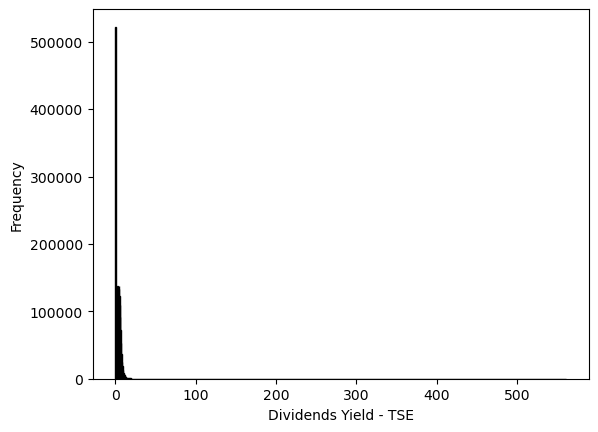

In [594]:
# Plot the distribution
plt.hist(df['股利殖利率-TSE'], bins=1000, edgecolor='black')

# Add labels and title
plt.xlabel('Dividends Yield - TSE')
plt.ylabel('Frequency')

# Display the plot
plt.show()

In [595]:
# 看一下99.5百分位數
outlier_threshold = df['股利殖利率-TSE'].quantile(0.995)
outlier_threshold

14.52

In [596]:
# 將所有 股利殖利率-TSE 大於 99.5 百分位數的值，都設定為 99.5 百分位數
df.loc[df['股利殖利率-TSE'] > outlier_threshold, '股利殖利率-TSE'] = outlier_threshold

In [597]:
# 可看到敘述統計中，最大值(Max)被限制在 99.5 百分位數
df['股利殖利率-TSE'].describe()

count   2076441.000
mean          3.409
std           2.927
min           0.000
25%           0.530
50%           3.190
75%           5.350
max          14.520
Name: 股利殖利率-TSE, dtype: float64

## 2.4 重複值處理

- 相對簡單的問題，但務必要注意。

- 在選擇保留哪一筆資料之前(keep first or last)，請先確認資料的順序。


In [598]:
# 檢視重複的資料
duplicates = df.duplicated()
df[duplicates]

,證券代碼,年月日,開盤價(元),最高價(元),最低價(元),收盤價(元),成交量(千股),成交值(千元),報酬率％,週轉率％,...,高低價差%,次日開盤參考價,次日漲停價,次日跌停價,注意股票(A),處置股票(D),全額交割(Y),市場別,最後揭示買價_fillna_1,最後揭示買價_fillna_2
478449,1101 台泥,2020-01-02,32.264,32.522,32.264,32.485,18470,813465,0.915,0.338,...,0.801,44.100,48.500,39.700,NaN,NaN,NaN,TSE,44.050,44.050
476682,1101 台泥,2020-01-03,32.522,32.596,32.007,32.375,18387,807459,-0.340,0.336,...,1.814,43.950,48.300,39.600,NaN,NaN,NaN,TSE,43.900,43.900
474914,1101 台泥,2020-01-06,32.043,32.191,31.896,32.007,13867,602752,-1.138,0.254,...,0.910,43.450,47.750,39.150,NaN,NaN,NaN,TSE,43.400,43.400
473146,1101 台泥,2020-01-07,32.007,32.117,31.822,32.117,14185,616059,0.345,0.259,...,0.921,43.600,47.950,39.250,NaN,NaN,NaN,TSE,43.550,43.550
471378,1101 台泥,2020-01-08,31.786,32.080,31.786,31.970,13465,583893,-0.459,0.246,...,0.917,43.400,47.700,39.100,NaN,NaN,NaN,TSE,43.350,43.350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1308743,9962 有益,2021-10-25,13.933,14.315,13.806,13.933,1101,18195,0.306,1.220,...,3.670,16.400,18.000,14.800,NaN,NaN,NaN,OTC,16.400,16.400
1306963,9962 有益,2021-10-26,14.230,14.358,13.806,13.848,1014,16771,-0.610,1.124,...,3.963,16.300,17.900,14.700,NaN,NaN,NaN,OTC,16.250,16.250
1305183,9962 有益,2021-10-27,14.060,14.060,13.551,13.763,777,12563,-0.613,0.861,...,3.681,16.200,17.800,14.600,NaN,NaN,NaN,OTC,16.150,16.150
1303403,9962 有益,2021-10-28,13.636,13.891,13.551,13.636,923,14869,-0.926,1.023,...,2.469,16.050,17.650,14.450,NaN,NaN,NaN,OTC,16.050,16.050


In [599]:
df[(df['證券代碼']=='1101 台泥') & (df['年月日']=='2020-01-02')]

,證券代碼,年月日,開盤價(元),最高價(元),最低價(元),收盤價(元),成交量(千股),成交值(千元),報酬率％,週轉率％,...,高低價差%,次日開盤參考價,次日漲停價,次日跌停價,注意股票(A),處置股票(D),全額交割(Y),市場別,最後揭示買價_fillna_1,最後揭示買價_fillna_2
451941,1101 台泥,2020-01-02,32.264,32.522,32.264,32.485,18470,813465,0.915,0.338,...,0.801,44.100,48.500,39.700,NaN,NaN,NaN,TSE,44.050,44.050
478449,1101 台泥,2020-01-02,32.264,32.522,32.264,32.485,18470,813465,0.915,0.338,...,0.801,44.100,48.500,39.700,NaN,NaN,NaN,TSE,44.050,44.050


In [600]:
# 若當出現重複的行時，我們只保留最後一個
df_no_duplicates = df.drop_duplicates(keep='last')

# 也可以保留第一個
df_no_duplicates = df.drop_duplicates(keep='first')

df_no_duplicates[(df_no_duplicates['證券代碼']=='1101 台泥') & (df_no_duplicates['年月日']=='2020-01-02')]

,證券代碼,年月日,開盤價(元),最高價(元),最低價(元),收盤價(元),成交量(千股),成交值(千元),報酬率％,週轉率％,...,高低價差%,次日開盤參考價,次日漲停價,次日跌停價,注意股票(A),處置股票(D),全額交割(Y),市場別,最後揭示買價_fillna_1,最後揭示買價_fillna_2
451941,1101 台泥,2020-01-02,32.264,32.522,32.264,32.485,18470,813465,0.915,0.338,...,0.801,44.100,48.500,39.700,NaN,NaN,NaN,TSE,44.050,44.050


In [601]:
# 如果只關心特定欄位中的重複值，可以在 duplicated() 和 drop_duplicates() 方法中指定欄位名。

# 以下例子代表每一天的股票代號和日期都不會重複
df_no_duplicates = df.drop_duplicates(subset=['證券代碼', '年月日'], keep='last')
df_no_duplicates

,證券代碼,年月日,開盤價(元),最高價(元),最低價(元),收盤價(元),成交量(千股),成交值(千元),報酬率％,週轉率％,...,高低價差%,次日開盤參考價,次日漲停價,次日跌停價,注意股票(A),處置股票(D),全額交割(Y),市場別,最後揭示買價_fillna_1,最後揭示買價_fillna_2
35267,1101 台泥,2019-01-02,22.757,22.885,22.598,22.598,6566,234262,-0.281,0.128,...,1.264,35.500,39.050,31.950,NaN,NaN,NaN,TSE,35.500,35.500
33502,1101 台泥,2019-01-03,22.598,22.662,22.344,22.375,9160,323494,-0.986,0.179,...,1.408,35.150,38.650,31.650,NaN,NaN,NaN,TSE,35.150,35.150
31738,1101 台泥,2019-01-04,22.280,22.694,22.216,22.566,10692,376905,0.854,0.209,...,2.134,35.450,38.950,31.950,NaN,NaN,NaN,TSE,35.400,35.400
29975,1101 台泥,2019-01-07,22.821,23.044,22.789,22.917,14906,537441,1.551,0.292,...,1.128,36.000,39.600,32.400,NaN,NaN,NaN,TSE,36.000,36.000
28212,1101 台泥,2019-01-08,22.853,22.885,22.630,22.630,10987,393334,-1.250,0.215,...,1.111,35.550,39.100,32.000,NaN,NaN,NaN,TSE,35.550,35.550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2115494,9962 有益,2023-08-17,17.050,17.400,17.000,17.300,159,2747,0.290,0.176,...,2.319,17.300,19.000,15.600,NaN,NaN,NaN,OTC,17.300,17.300
2117292,9962 有益,2023-08-18,17.300,17.500,17.250,17.400,231,4020,0.578,0.256,...,1.445,17.400,19.100,15.700,NaN,NaN,NaN,OTC,17.250,17.250
2119090,9962 有益,2023-08-21,17.400,17.400,17.100,17.100,90,1549,-1.724,0.100,...,1.724,17.100,18.800,15.400,NaN,NaN,NaN,OTC,17.100,17.100
2120889,9962 有益,2023-08-22,17.000,17.000,16.700,16.800,442,7446,-1.754,0.490,...,1.754,16.800,18.450,15.150,NaN,NaN,NaN,OTC,16.800,16.800


## 2.5 標準化、歸一化

1. 標準化將資料的平均值變為 0，標準差變為 1。
   - 在應用標準化之前，需確保數據的分佈不會因為極端值而受到過度的影響。
2. 歸一化則是將資料縮放到 0 ~ 1 之間。
   - 歸一化使得所有特徵都在相似的範圍內，有助於梯度下降等優化算法更快收斂。

In [602]:
# 假設我想要把 報酬率% 進行標準化
mean = df['報酬率％'].mean()
std = df['報酬率％'].std()

standardized_data = (df['報酬率％'] - mean) / std

standardized_data.head()

35267   -0.139
33502   -0.418
31738    0.311
29975    0.588
28212   -0.523
Name: 報酬率％, dtype: float64

In [603]:
# 當我想要把多個欄位進行標準化時，可以使用函數 apply() 方法
def standardize(x):
    return (x - x.mean()) / x.std()

df[['報酬率％_標準化']] = df[['報酬率％']].apply(standardize)

df[['報酬率％', '報酬率％_標準化']]

,報酬率％,報酬率％_標準化
35267,-0.281,-0.139
33502,-0.986,-0.418
31738,0.854,0.311
29975,1.551,0.588
28212,-1.250,-0.523
...,...,...
2115494,0.290,0.088
2117292,0.578,0.202
2119090,-1.724,-0.711
2120889,-1.754,-0.723


In [604]:
# 檢查一下，是不是真的標準化了
df[['報酬率％', '報酬率％_標準化']].describe()

,報酬率％,報酬率％_標準化
count,2122683.000,2122683.000
mean,0.069,0.000
std,2.523,1.001
min,-74.780,-29.665
25%,-0.876,-0.374
50%,0.000,-0.027
75%,0.840,0.306
max,190.333,75.406


## 2.6 課堂實作練習
  - 將`['高低價差%']` 資料進行歸一化，用函數apply() 的方式處理。

* 歸一化公式如下，其中 $X_{min}$ 和 $X_{max}$ 分別是資料的最小值和最大值。
- $X_{normalized} = (X - X_{min}) / (X_{max} - X_{min})$

In [605]:
# 運用apply()，將 高低價差& 進行歸一化


# 3.0 股票因子計算

## 3.1 價量因子 

In [606]:
# 讀入台股價量資料
df_price = pd.read_feather('./Data/價量資料.feather')
df_price.head()

,證券名稱,資料日,市場別,開盤價,最高價,最低價,收盤價,成交量(千股),成交金額(元),成交筆數,周轉率,流通在外股數(千股),個股市值(元),市值比重,成交金額比重,現金股利率(TEJ),本益比(TEJ),股價淨值比(TEJ),股價營收比(TEJ)
0,1101台泥,2020-01-02,TWSE,43.800,44.150,43.800,32.485,18470.000,813465904.000,6251.000,0.338,5465619.000,241033807000.000,0.660,0.628,7.004,10.508,1.312,1.968
1,1102亞泥,2020-01-02,TWSE,48.100,49.000,48.050,37.387,8890.000,433140140.000,4391.000,0.265,3361447.000,164374768000.000,0.450,0.335,5.726,10.471,1.148,1.880
2,1103嘉泥,2020-01-02,TWSE,22.400,22.700,22.350,18.400,2194.000,49255964.000,883.000,0.283,774781.000,17316345000.000,0.047,0.038,4.474,NaN,0.791,8.834
3,1104環泥,2020-01-02,TWSE,19.600,19.700,19.550,15.606,867.000,17026458.000,384.000,0.133,653609.000,12843421000.000,0.035,0.013,5.089,12.896,0.724,2.623
4,1108幸福,2020-01-02,TWSE,8.380,8.450,8.280,7.037,310.000,2593989.000,162.000,0.077,404738.000,3387657000.000,0.009,0.002,0.000,NaN,0.794,0.960


In [607]:
df_price.columns

Index(['證券名稱', '資料日', '市場別', '開盤價', '最高價', '最低價', '收盤價', '成交量(千股)', '成交金額(元)',
       '成交筆數', '周轉率', '流通在外股數(千股)', '個股市值(元)', '市值比重', '成交金額比重', '現金股利率(TEJ)',
       '本益比(TEJ)', '股價淨值比(TEJ)', '股價營收比(TEJ)'],
      dtype='object')

### 歷史報酬因子: 過往5日報酬

In [608]:
df_mmt = df_price[['證券名稱','資料日','收盤價','個股市值(元)']]

# groupby:依照證券代碼分群 ； apply:套用計算函式 ； reset_index:groupby運算後回復原本排序
df_mmt['5日歷史報酬'] = df_mmt.groupby('證券名稱').apply(lambda x:x['收盤價'] / x['收盤價'].shift(5) - 1).reset_index(level=0,drop=True)

# 驗證結果
df_mmt[df_mmt['證券名稱'] == '1101台泥'].tail(10)

,證券名稱,資料日,收盤價,個股市值(元),5日歷史報酬
1548287,1101台泥,2023-11-17,33.200,250699234000.000,0.011
1549981,1101台泥,2023-11-20,33.600,253719707000.000,0.024
1551676,1101台泥,2023-11-21,34.200,258250416000.000,0.052
1553372,1101台泥,2023-11-22,33.850,255607502000.000,0.021
1555068,1101台泥,2023-11-23,34.000,256740179000.000,0.029
1556764,1101台泥,2023-11-24,33.750,254852384000.000,0.017
1558460,1101台泥,2023-11-27,33.950,256362620000.000,0.010
1560156,1101台泥,2023-11-28,34.500,260515770000.000,0.009
1561852,1101台泥,2023-11-29,34.250,258627975000.000,0.012
1563549,1101台泥,2023-11-30,34.950,263913802000.000,0.028


### 技術指標因子: 10日RSI指標

In [609]:
df_mmt['每日漲跌幅'] = df_mmt.groupby('證券名稱').apply(lambda x:x['收盤價'] - x['收盤價'].shift(1)).reset_index(level=0,drop=True)
df_mmt['每日漲幅'] = df_mmt['每日漲跌幅'].apply(lambda x:x if x > 0 else 0)
df_mmt['每日跌幅'] = df_mmt['每日漲跌幅'].apply(lambda x:x if x < 0 else 0)
df_mmt['10日平均漲幅'] = df_mmt.groupby('證券名稱')['每日漲幅'].rolling(10).mean().reset_index(level=0,drop=True)
df_mmt['10日平均跌幅'] = df_mmt.groupby('證券名稱')['每日跌幅'].rolling(10).mean().reset_index(level=0,drop=True)
df_mmt['10日RS'] = df_mmt['10日平均漲幅'] / abs(df_mmt['10日平均跌幅'])
df_mmt['10日RSI'] = (df_mmt['10日RS'] / (1 + df_mmt['10日RS'])) *100

# 驗證結果
df_mmt[df_mmt['證券名稱'] == '1101台泥'].tail(15)

,證券名稱,資料日,收盤價,個股市值(元),5日歷史報酬,每日漲跌幅,每日漲幅,每日跌幅,10日平均漲幅,10日平均跌幅,10日RS,10日RSI
1539817,1101台泥,2023-11-10,32.850,248056320000.000,-0.002,-0.050,0.000,-0.050,0.155,-0.055,2.818,73.810
1541511,1101台泥,2023-11-13,32.800,247678761000.000,0.000,-0.050,0.000,-0.050,0.140,-0.060,2.333,70.000
1543205,1101台泥,2023-11-14,32.500,245413407000.000,-0.002,-0.300,0.000,-0.300,0.115,-0.090,1.278,56.098
1544899,1101台泥,2023-11-15,33.150,250321675000.000,0.008,0.650,0.650,0.000,0.180,-0.075,2.400,70.588
1546593,1101台泥,2023-11-16,33.050,249566557000.000,0.005,-0.100,0.000,-0.100,0.155,-0.085,1.824,64.583
1548287,1101台泥,2023-11-17,33.200,250699234000.000,0.011,0.150,0.150,0.000,0.115,-0.085,1.353,57.500
1549981,1101台泥,2023-11-20,33.600,253719707000.000,0.024,0.400,0.400,0.000,0.155,-0.075,2.067,67.391
1551676,1101台泥,2023-11-21,34.200,258250416000.000,0.052,0.600,0.600,0.000,0.215,-0.050,4.300,81.132
1553372,1101台泥,2023-11-22,33.850,255607502000.000,0.021,-0.350,0.000,-0.350,0.180,-0.085,2.118,67.925
1555068,1101台泥,2023-11-23,34.000,256740179000.000,0.029,0.150,0.150,0.000,0.195,-0.085,2.294,69.643


## 3.2 籌碼因子 

In [610]:
# 讀入台股籌碼資料
df_chip = pd.read_feather('./Data/籌碼資料.feather')
df_chip.head()

,證券名稱,資料日,市場別,外資買進張數,外資賣出張數,外資買賣超張數,外資買進金額(元),外資賣出金額(元),外資買賣超金額(元),外資持股率,...,融券餘額(元),資券比,資券互抵,資券互抵(元),借券賣出,借券賣出(元),借券餘額,借券餘額(元),當沖成交股數(千股),當沖買賣占比
0,1101台泥,2020-01-02,TWSE,4375.000,6371.000,-1996.000,192938.000,280961.000,-88024.000,30.220,...,12771.950,3.000,0.000,0.000,2979.000,131198.730,141350.000,6225223.620,1947.000,10.540
1,1102亞泥,2020-01-02,TWSE,1744.000,2771.000,-1027.000,85282.000,135502.000,-50220.000,28.950,...,14031.220,5.020,1.000,48.720,293.000,14274.810,46221.000,2251864.010,1131.000,12.720
2,1103嘉泥,2020-01-02,TWSE,222.000,216.000,6.000,4962.000,4828.000,134.000,4.390,...,6039.000,8.820,3.000,67.350,3.000,67.350,2830.000,63532.930,217.000,9.890
3,1104環泥,2020-01-02,TWSE,54.000,232.000,-178.000,1061.000,4559.000,-3498.000,12.950,...,0.000,0.000,0.000,0.000,0.000,0.000,1181.000,23179.130,15.000,1.730
4,1108幸福,2020-01-02,TWSE,58.000,4.000,54.000,485.000,33.000,452.000,1.630,...,0.000,0.000,1.000,8.360,0.000,0.000,418.000,3495.270,52.000,16.760


In [611]:
df_chip.columns

Index(['證券名稱', '資料日', '市場別', '外資買進張數', '外資賣出張數', '外資買賣超張數', '外資買進金額(元)',
       '外資賣出金額(元)', '外資買賣超金額(元)', '外資持股率', '投信買進張數', '投信賣出張數', '投信買賣超張數',
       '投信買進金額(元)', '投信賣出金額(元)', '投信買賣超金額(元)', '投信持股率', '自營商買進張數(自行)',
       '自營商賣出張數(自行)', '自營買賣超張數(自行)', '自營商買進金額(自行)', '自營商賣出金額(自行)',
       '自營買賣超金額(自行)', '自營商買進張數(避險)', '自營商賣出張數(避險)', '自營買賣超張數(避險)',
       '自營商買進金額(避險)', '自營商賣出金額(避險)', '自營買賣超金額(避險)', '自營商持股率', '合計買進張數',
       '合計賣出張數', '合計買賣超張數', '合計買進金額(元)', '合計賣出金額(元)', '合計買賣超金額(元)', '融資買進',
       '融資賣出', '融資餘額', '融資餘額(元)', '融券買進', '融券賣出', '融券餘額', '融券餘額(元)', '資券比',
       '資券互抵', '資券互抵(元)', '借券賣出', '借券賣出(元)', '借券餘額', '借券餘額(元)', '當沖成交股數(千股)',
       '當沖買賣占比'],
      dtype='object')

### 三大法人買賣超因子

In [612]:
df_chip['三大法人買賣超金額'] = df_chip['外資買賣超金額(元)'] + df_chip['投信買賣超金額(元)'] + df_chip['自營買賣超金額(自行)'] + df_chip['自營買賣超金額(避險)'] 

# 驗證計算結果
df_chip[['證券名稱', '資料日','外資買賣超金額(元)','投信買賣超金額(元)','自營買賣超金額(自行)','自營買賣超金額(避險)','三大法人買賣超金額','合計買賣超金額(元)']]

,證券名稱,資料日,外資買賣超金額(元),投信買賣超金額(元),自營買賣超金額(自行),自營買賣超金額(避險),三大法人買賣超金額,合計買賣超金額(元)
0,1101台泥,2020-01-02,-88024.000,-221.000,53229.000,-10408.000,-45424.000,-45423.000
1,1102亞泥,2020-01-02,-50220.000,-98.000,23619.000,-3814.000,-30513.000,-30514.000
2,1103嘉泥,2020-01-02,134.000,0.000,67.000,0.000,201.000,201.000
3,1104環泥,2020-01-02,-3498.000,0.000,2358.000,0.000,-1140.000,-1140.000
4,1108幸福,2020-01-02,452.000,0.000,0.000,0.000,452.000,452.000
...,...,...,...,...,...,...,...,...
1565239,9951皇田,2023-11-30,1950.000,0.000,0.000,0.000,1950.000,1950.000
1565240,9955佳龍,2023-11-30,-647.000,0.000,0.000,0.000,-647.000,-647.000
1565241,9958世紀鋼,2023-11-30,50393.000,0.000,-1162.000,4316.000,53547.000,53574.000
1565242,9960邁達康,2023-11-30,0.000,0.000,0.000,0.000,0.000,0.000


## 3.3 月營收因子 
有季節性
公告日調整

In [613]:
# 讀入台股月營收資料
df_sales = pd.read_feather('./Data/月營收資料.feather')
df_sales.dropna(subset=['營收發布日'],inplace=True)
df_sales.head()

,證券名稱,年月,營收發布日,單月營收(千元),去年單月營收(千元),單月營收成長率％,單月營收與上月比％,累計營收(千元),去年累計營收(千元),累計營收成長率％,...,與歷史最高單月營收比%,歷史最低單月營收(千元),與歷史最低單月營收比%,近12月累計營收(千元),去年近12月累計營收(千元),近12月累計營收成長率％,近 3月累計營收(千元),去年近 3月累計營收(千元),近3月累計營收成長率％,近3月累計營收與上月比％
0,1101台泥,2020-01-01,2020-02-10,7502141.000,9394240.000,-20.140,-39.250,7502141.000,9394240.000,-20.140,...,-39.250,3632053.000,106.550,120910319.000,124371449.000,-2.780,31530750.000,32578184.000,-3.220,-10.530
1,1102亞泥,2020-01-01,2020-02-10,5210319.000,7905737.000,-34.090,-35.800,5210319.000,7905737.000,-34.090,...,-38.240,2552357.000,104.140,86646110.000,83884301.000,3.290,21326361.000,22080962.000,-3.420,-7.810
2,1103嘉泥,2020-01-01,2020-02-15,165029.000,177060.000,-6.790,4.530,165029.000,177060.000,-6.790,...,-84.040,108448.000,52.170,1871762.000,2097343.000,-10.760,508950.000,595829.000,-14.580,-2.280
3,1104環泥,2020-01-01,2020-02-10,359966.000,479518.000,-24.930,-21.350,359966.000,479518.000,-24.930,...,-34.820,268120.000,34.260,4886178.000,4800032.000,1.790,1311026.000,1366829.000,-4.080,-9.860
4,1108幸福,2020-01-01,2020-02-10,296395.000,353189.000,-16.080,-21.560,296395.000,353189.000,-16.080,...,-42.870,168065.000,76.360,3674902.000,3363450.000,9.260,1020117.000,923125.000,10.510,-4.850


In [614]:
df_sales.columns

Index(['證券名稱', '年月', '營收發布日', '單月營收(千元)', '去年單月營收(千元)', '單月營收成長率％',
       '單月營收與上月比％', '累計營收(千元)', '去年累計營收(千元)', '累計營收成長率％', '歷史最高單月營收(千元)',
       '與歷史最高單月營收比%', '歷史最低單月營收(千元)', '與歷史最低單月營收比%', '近12月累計營收(千元)',
       '去年近12月累計營收(千元)', '近12月累計營收成長率％', '近 3月累計營收(千元)', '去年近 3月累計營收(千元)',
       '近3月累計營收成長率％', '近3月累計營收與上月比％'],
      dtype='object')

### 月營收MoM因子

In [615]:
df_sales['月營收_MoM'] = df_sales.groupby('證券名稱').apply(lambda x: (x['單月營收(千元)'] - x['單月營收(千元)'].shift(1)) / x['單月營收(千元)'].shift(1)).reset_index(level=0,drop=True)

# 驗證計算結果
df_sales[df_sales['證券名稱'] == '1101台泥'][['證券名稱', '營收發布日', '單月營收(千元)', '月營收_MoM', '單月營收與上月比％']].tail()

,證券名稱,營收發布日,單月營收(千元),月營收_MoM,單月營收與上月比％
79546,1101台泥,2023-07-10,8816109.000,-0.081,-8.130
81558,1101台泥,2023-08-10,8953462.000,0.016,1.560
83572,1101台泥,2023-09-11,9379408.000,0.048,4.760
85591,1101台泥,2023-10-11,8735157.000,-0.069,-6.870
87610,1101台泥,2023-11-10,9371746.000,0.073,7.290


### 月營收YoY因子

In [616]:
df_sales['月營收_YoY'] = df_sales.groupby('證券名稱').apply(lambda x: (x['單月營收(千元)'] - x['單月營收(千元)'].shift(12)) / x['單月營收(千元)'].shift(12)).reset_index(level=0,drop=True)

# 驗證計算結果
df_sales[df_sales['證券名稱'] == '1101台泥'][['證券名稱', '營收發布日', '單月營收(千元)', '月營收_YoY', '單月營收成長率％']].tail()

,證券名稱,營收發布日,單月營收(千元),月營收_YoY,單月營收成長率％
79546,1101台泥,2023-07-10,8816109.000,-0.036,-3.610
81558,1101台泥,2023-08-10,8953462.000,-0.114,-11.370
83572,1101台泥,2023-09-11,9379408.000,-0.123,-12.260
85591,1101台泥,2023-10-11,8735157.000,-0.160,-16.050
87610,1101台泥,2023-11-10,9371746.000,-0.176,-17.560


## 3.4 財報因子 

In [617]:
# 讀入台股季財報資料
df_fin = pd.read_feather('./Data/季財報資料.feather')
df_fin = df_fin[df_fin['序號']=='001']
df_fin.drop_duplicates(subset=['證券名稱','編表日'],inplace=True)
df_fin.dropna(subset=['編表日'],inplace=True)
df_fin.head()

,證券名稱,年/月,期間別,序號,季別,合併(Y/N),幣別,編表日,產業別,現金及約當現金,...,固定資產週轉率,期末收帳天數,期末付帳天數,期末售貨天數,每股淨值,每股營業收入,每股營業利益,每股稅前淨利,每股稅後淨利,每人營收
0,1101台泥,2020-03-01,Q,001,1,Y,TWD,2020-05-12,F,33747714.000,...,0.180,252.370,39.540,47.780,34.800,4.020,0.820,0.870,0.640,2069.710
2,1102亞泥,2020-03-01,Q,001,1,Y,TWD,2020-05-15,F,29628489.000,...,0.210,179.400,101.900,69.680,42.300,3.980,0.600,0.470,0.340,2267.790
4,1103嘉泥,2020-03-01,Q,001,1,Y,TWD,2020-05-14,F,2416061.000,...,0.060,43.510,29.410,3.620,27.270,0.640,-0.210,-0.270,-0.280,1208.130
6,1104環泥,2020-03-01,Q,001,1,Y,TWD,2020-05-12,F,197975.000,...,0.180,87.930,42.600,24.260,26.850,1.920,0.100,0.080,0.070,NaN
8,1108幸福,2020-03-01,Q,001,1,Y,TWD,2020-05-15,F,262409.000,...,0.600,91.850,44.580,346.070,10.730,2.730,0.270,0.260,0.230,2236.280


In [618]:
for c in df_fin.columns:
    print(c)

證券名稱
年/月
期間別
序號
季別
合併(Y/N)
幣別
編表日
產業別
現金及約當現金
應收帳款
長期應收款
存貨
應付帳款
固定資產
無形資產
預付款
其他應收款
預收款_流動
其他應付款
預收款_非流動
金融借款_流動
金融借款_非流動
非金融借款_流動
非金融借款_非流動
普通股股本
資本公積
保留盈餘
特別股股本
非控制權益
其他權益
流動資產合計
非流動資產合計
資產總計
流動負債合計
非流動負債合計
負債總額
股東權益總計
負債及股東權益總計
長短期借款
速動資產
生財設備
長短期應收帳款
營業收入
營業成本
營業費用
所得稅費用
利息收入
利息支出
稅前淨利
稅後淨利
母公司淨利
每股盈餘
特別股股息
營業毛利
營業利益
非常續性利益
常續性利益
營業外收入及支出
稅前息前淨利
折舊及攤提
營運產生現金流量
投資產生現金流量
融資產生現金流量
員工人數
期末股數
加權平均股數
稅率
常續ROE
常續ROA
營業毛利率
營業利益率
稅前淨利率
稅後淨利率
營業費用率
業外收支率
營收成長率
營業毛利成長率
營業利益成長率
稅前淨利成長率
稅後淨利成長率
資產成長率
淨值成長率
固定資產成長率
速動比率
流動比率
現金流量比率
負債比率
利息支出率
利息保障倍數
借款依存度
應收帳款週轉率
應付帳款週轉率
存貨週轉率
總資產週轉率
淨值週轉率
固定資產週轉率
期末收帳天數
期末付帳天數
期末售貨天數
每股淨值
每股營業收入
每股營業利益
每股稅前淨利
每股稅後淨利
每人營收


### 營業利益率YoY

In [619]:
df_fin['營利率'] = df_fin['營業利益'] / df_fin['營業收入']
df_fin['營利率_YoY'] = df_fin.groupby('證券名稱').apply(lambda x: (x['營利率'] - x['營利率'].shift(4)) / x['營利率'].shift(4)).reset_index(level=0,drop=True)

# 驗證計算結果
df_fin[df_fin['證券名稱'] == '1101台泥'][['證券名稱', '編表日','營業利益率', '營利率', '營利率_YoY']].head()

,證券名稱,編表日,營業利益率,營利率,營利率_YoY
0,1101台泥,2020-05-12,20.300,0.203,NaN
3243,1101台泥,2020-08-11,30.610,0.306,NaN
6497,1101台泥,2020-11-10,30.370,0.304,NaN
9742,1101台泥,2021-03-19,26.480,0.265,NaN
12985,1101台泥,2021-05-12,19.090,0.191,-0.059


# 4.0 多因子選股

 - 每月第一個交易日換倉

In [620]:
# 挑選多因子組合
df_mmt_s = df_mmt[['證券名稱', '資料日','5日歷史報酬','10日RSI','個股市值(元)']]
df_chip_s = df_chip[['證券名稱', '資料日','三大法人買賣超金額']]
df_sales_s = df_sales[['證券名稱', '營收發布日', '月營收_YoY']]
df_fin_s = df_fin[['證券名稱', '編表日','營利率_YoY']]

In [621]:
# 將價量以外因子(籌碼、月營收、財報因子)，mapping至日頻率
df_chip_s['資料日'] = pd.to_datetime(df_chip_s['資料日'])
df_chip_s.set_index('資料日', inplace=True)
df_chip_s = df_chip_s.groupby('證券名稱').resample('D').ffill().reset_index(level=0,drop=True)
df_chip_s = df_chip_s.sort_values(by=['證券名稱','資料日']).reset_index()

df_sales_s['營收發布日'] = pd.to_datetime(df_sales_s['營收發布日'])
df_sales_s.set_index('營收發布日', inplace=True)
df_sales_s = df_sales_s.groupby('證券名稱').resample('D').ffill().reset_index(level=0,drop=True)
df_sales_s = df_sales_s.sort_values(by=['證券名稱','營收發布日']).reset_index()

df_fin_s['編表日'] = pd.to_datetime(df_fin_s['編表日'])
df_fin_s.set_index('編表日', inplace=True)
df_fin_s = df_fin_s.groupby('證券名稱').resample('D').ffill().reset_index(level=0,drop=True)
df_fin_s = df_fin_s.sort_values(by=['證券名稱','編表日']).reset_index()

df_fin_s

,編表日,證券名稱,營利率_YoY
0,2020-05-12,1101台泥,NaN
1,2020-05-13,1101台泥,NaN
2,2020-05-14,1101台泥,NaN
3,2020-05-15,1101台泥,NaN
4,2020-05-16,1101台泥,NaN
...,...,...,...
2087065,2023-11-09,9962有益,-0.501
2087066,2023-11-10,9962有益,-0.501
2087067,2023-11-11,9962有益,-0.501
2087068,2023-11-12,9962有益,-0.501


In [622]:
# 以價量資料(台股交易日)為基準，合併不同頻率之資料
df_all_factor = df_mmt_s.copy()

# merge: 合併兩個dataframe，on=合併基準欄位，how=以哪個dataframe為準)
df_all_factor = pd.merge(df_all_factor, df_chip_s, on=['證券名稱', '資料日'], how='left')
df_all_factor = pd.merge(df_all_factor, df_sales_s, left_on=['證券名稱', '資料日'], right_on=['證券名稱', '營收發布日'], how='left')
df_all_factor = pd.merge(df_all_factor, df_fin_s, left_on=['證券名稱', '資料日'], right_on=['證券名稱', '編表日'], how='left')
df_all_factor.drop(columns=['營收發布日','編表日'],inplace=True)

df_all_factor

,證券名稱,資料日,5日歷史報酬,10日RSI,個股市值(元),三大法人買賣超金額,月營收_YoY,營利率_YoY
0,1101台泥,2020-01-02,NaN,NaN,241033807000.000,-45424.000,NaN,NaN
1,1102亞泥,2020-01-02,NaN,NaN,164374768000.000,-30513.000,NaN,NaN
2,1103嘉泥,2020-01-02,NaN,NaN,17316345000.000,201.000,NaN,NaN
3,1104環泥,2020-01-02,NaN,NaN,12843421000.000,-1140.000,NaN,NaN
4,1108幸福,2020-01-02,NaN,NaN,3387657000.000,452.000,NaN,NaN
...,...,...,...,...,...,...,...,...
1565241,9951皇田,2023-11-30,0.013,51.163,5842200000.000,1950.000,NaN,NaN
1565242,9955佳龍,2023-11-30,0.053,66.154,2569885000.000,-647.000,NaN,NaN
1565243,9958世紀鋼,2023-11-30,0.012,43.750,39171316000.000,53547.000,NaN,NaN
1565244,9960邁達康,2023-11-30,-0.007,41.176,905318000.000,0.000,NaN,NaN


In [623]:
# 刪除含有缺失值之資料行
df_all_factor.dropna(inplace=True)
df_all_factor = df_all_factor.sort_values(by=['證券名稱','資料日']).reset_index(level=0,drop=True)
df_all_factor

,證券名稱,資料日,5日歷史報酬,10日RSI,個股市值(元),三大法人買賣超金額,月營收_YoY,營利率_YoY
0,1101台泥,2021-05-12,-0.024,35.780,300482282000.000,-57041.000,-0.053,-0.059
1,1101台泥,2021-05-13,-0.072,31.481,298059038000.000,-365014.000,-0.053,-0.059
2,1101台泥,2021-05-14,-0.052,37.624,300482282000.000,-145626.000,-0.053,-0.059
3,1101台泥,2021-05-17,-0.095,34.862,290183494000.000,66916.000,-0.053,-0.059
4,1101台泥,2021-05-18,-0.031,49.167,302905527000.000,8350.000,-0.053,-0.059
...,...,...,...,...,...,...,...,...
979777,9962有益,2023-11-01,-0.012,66.667,1547277000.000,103.000,0.070,-0.501
979778,9962有益,2023-11-02,-0.003,69.231,1556299000.000,69.000,0.070,-0.501
979779,9962有益,2023-11-03,0.003,71.429,1565322000.000,243.000,0.070,-0.501
979780,9962有益,2023-11-06,0.020,78.947,1587877000.000,686.000,0.070,-0.501


In [624]:
# 依據各指標特性，制定篩選規則

# 依據指標大小排序(數值越大，排名越小)
df_select = df_all_factor.copy()
df_select['個股市值_排名'] = df_select.groupby('資料日')['個股市值(元)'].rank(ascending=False)
# df_select['5日歷史報酬_排名'] = df_select.groupby('資料日')['5日歷史報酬'].rank(ascending=False)
# df_select['三大法人買賣超金額_排名'] = df_select.groupby('資料日')['三大法人買賣超金額'].rank(ascending=False)

# 1.市值前500大公司 
df_select = df_select[df_select['個股市值_排名'] <= 500]

# 2.月營收需正成長
df_select = df_select[(df_all_factor['月營收_YoY']>0) & (df_all_factor['營利率_YoY']>0)]

# 3.按5日歷史報酬排序，每月選出前10名個股
df_select = df_select.groupby('資料日').apply(lambda x: x.sort_values(by='5日歷史報酬', ascending=False).head(10))

df_select.reset_index(drop=True, inplace=True)

# 抽樣驗證
df_select[df_select['資料日']=='2023-11-01']


,證券名稱,資料日,5日歷史報酬,10日RSI,個股市值(元),三大法人買賣超金額,月營收_YoY,營利率_YoY,個股市值_排名
6161,2850新產,2023-11-01,0.071,66.279,21106348000.000,3273.000,0.065,0.544,253.000
6162,6189豐藝,2023-11-01,0.069,82.500,11896160000.000,16800.000,0.379,0.209,388.000
6163,2707晶華,2023-11-01,0.053,59.494,26754680000.000,-31520.000,0.106,1.534,205.000
6164,4105東洋,2023-11-01,0.051,89.855,21010922000.000,52390.000,0.103,0.036,255.000
6165,6806森崴能源,2023-11-01,0.040,67.059,22479600000.000,82399.000,2.970,0.278,234.000
6166,6291沛亨,2023-11-01,0.040,61.468,8778000000.000,627.000,0.834,2.327,496.000
6167,2618長榮航,2023-11-01,0.038,71.739,154441661000.000,168585.000,0.448,1.158,47.000
6168,2610華航,2023-11-01,0.034,60.377,121022259000.000,-361886.000,0.242,2.877,62.000
6169,2211長榮鋼,2023-11-01,0.033,78.571,30155713000.000,75810.000,0.267,0.506,180.000
6170,4904遠傳,2023-11-01,0.023,68.182,250252862000.000,72257.000,0.017,0.058,29.000


In [629]:
# 每日選股名單
df_select_d = df_select[['資料日','證券名稱']].sort_values(by=['資料日','證券名稱'])

# 每月第一個交易日之選股名單
df_select_d['年月'] = df_select_d['資料日'].dt.strftime('%Y-%m')
reb_date = df_select_d[['年月','資料日']].sort_values(by='資料日').drop_duplicates(subset=['年月'], keep = 'first').reset_index(drop=True)
df_select_m = df_select_d[df_select_d['資料日'].isin(reb_date['資料日'])].copy().reset_index(drop=True)

df_select_m = df_select_m[df_select_m['資料日']>'2021-05-01']
df_select_m

,資料日,證券名稱,年月
2,2021-05-03,1232大統益,2021-05
3,2021-05-03,2377微星,2021-05
4,2021-05-03,2636台驊投控,2021-05
5,2021-05-03,2809京城銀,2021-05
6,2021-05-03,3035智原,2021-05
...,...,...,...
307,2023-11-01,4105東洋,2023-11
308,2023-11-01,4904遠傳,2023-11
309,2023-11-01,6189豐藝,2023-11
310,2023-11-01,6291沛亨,2023-11


## 4.1 課堂實作練習


# 5.0 簡單的回測

In [630]:
# 讀取價格資料，進行整理
df = pd.read_feather('./Data/價量資料.feather')
df.sort_values(by=['證券名稱', '資料日'], ascending=True, inplace=True)
df.drop_duplicates(subset=['證券名稱', '資料日'], keep='last', inplace=True)
df['資料日'] = pd.to_datetime(df['資料日'])
df.set_index('資料日', inplace=True)
df.head()


,證券名稱,市場別,開盤價,最高價,最低價,收盤價,成交量(千股),成交金額(元),成交筆數,周轉率,流通在外股數(千股),個股市值(元),市值比重,成交金額比重,現金股利率(TEJ),本益比(TEJ),股價淨值比(TEJ),股價營收比(TEJ)
資料日,,,,,,,,,,,,,,,,,,
2020-01-02,1101台泥,TWSE,43.800,44.150,43.800,32.485,18470.000,813465904.000,6251.000,0.338,5465619.000,241033807000.000,0.660,0.628,7.004,10.508,1.312,1.968
2020-01-03,1101台泥,TWSE,44.150,44.250,43.450,32.375,18387.000,807459827.000,6733.000,0.336,5465619.000,240213964000.000,0.657,0.453,7.028,10.473,1.308,1.961
2020-01-06,1101台泥,TWSE,43.500,43.700,43.300,32.007,13867.000,602752323.000,5566.000,0.254,5465619.000,237481154000.000,0.659,0.457,7.109,10.354,1.293,1.939
2020-01-07,1101台泥,TWSE,43.450,43.600,43.200,32.117,14185.000,616059913.000,4739.000,0.260,5465619.000,238300997000.000,0.665,0.397,7.085,10.389,1.297,1.945
2020-01-08,1101台泥,TWSE,43.150,43.550,43.150,31.970,13465.000,583893343.000,4685.000,0.246,5465619.000,237207873000.000,0.665,0.425,7.117,10.342,1.291,1.936


In [631]:
# 每月初收盤價
monthly_start_price = df.groupby('證券名稱').resample('M')['收盤價'].first().unstack().transpose()
# 每月底收盤價
monthly_end_price = df.groupby('證券名稱').resample('M')['收盤價'].last().unstack().transpose()

# 月底到下個月底的報酬
monthly_returns = monthly_end_price.pct_change()

monthly_returns.head()

證券名稱,1101台泥,1102亞泥,1103嘉泥,1104環泥,1108幸福,1109信大,1110東泥,1201味全,1203味王,1210大成,...,9944新麗,9945潤泰新,9946三發地產,9949琉園,9950萬國通,9951皇田,9955佳龍,9958世紀鋼,9960邁達康,9962有益
資料日,,,,,,,,,,,,,,,,,,,,,
2020-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-29,0.005,-0.018,-0.029,-0.035,-0.034,-0.094,-0.026,-0.016,0.002,-0.024,...,-0.159,-0.033,-0.206,-0.004,0.000,-0.097,0.010,0.073,-0.030,-0.027
2020-03-31,-0.065,-0.112,-0.241,-0.110,-0.172,-0.056,-0.030,-0.076,-0.021,-0.083,...,-0.288,-0.069,-0.370,-0.094,-0.283,-0.196,-0.295,0.056,-0.072,-0.194
2020-04-30,0.094,0.114,0.135,0.114,0.192,0.100,0.000,0.095,0.057,0.122,...,0.446,0.168,0.292,0.353,0.008,0.126,0.158,0.079,0.002,0.087
2020-05-31,-0.015,-0.008,-0.029,0.006,0.197,0.000,0.022,0.018,0.018,0.037,...,0.064,0.025,-0.083,-0.232,-0.063,0.093,0.060,0.068,-0.002,-0.018


In [646]:
# 補齊第一個月報酬缺失值
monthly_returns.iloc[0,:] = monthly_end_price.iloc[0,:] / monthly_start_price.iloc[0,:] - 1

print(monthly_returns.shape)
monthly_returns.head()

(47, 1733)


證券名稱,1101台泥,1102亞泥,1103嘉泥,1104環泥,1108幸福,1109信大,1110東泥,1201味全,1203味王,1210大成,...,9944新麗,9945潤泰新,9946三發地產,9949琉園,9950萬國通,9951皇田,9955佳龍,9958世紀鋼,9960邁達康,9962有益
資料日,,,,,,,,,,,,,,,,,,,,,
2020-01-31,-0.046,-0.077,-0.081,-0.064,-0.057,-0.088,-0.017,-0.127,-0.022,-0.044,...,0.480,-0.060,-0.048,-0.023,-0.104,-0.074,0.016,-0.055,-0.083,-0.037
2020-02-29,0.005,-0.018,-0.029,-0.035,-0.034,-0.094,-0.026,-0.016,0.002,-0.024,...,-0.159,-0.033,-0.206,-0.004,0.000,-0.097,0.010,0.073,-0.030,-0.027
2020-03-31,-0.065,-0.112,-0.241,-0.110,-0.172,-0.056,-0.030,-0.076,-0.021,-0.083,...,-0.288,-0.069,-0.370,-0.094,-0.283,-0.196,-0.295,0.056,-0.072,-0.194
2020-04-30,0.094,0.114,0.135,0.114,0.192,0.100,0.000,0.095,0.057,0.122,...,0.446,0.168,0.292,0.353,0.008,0.126,0.158,0.079,0.002,0.087
2020-05-31,-0.015,-0.008,-0.029,0.006,0.197,0.000,0.022,0.018,0.018,0.037,...,0.064,0.025,-0.083,-0.232,-0.063,0.093,0.060,0.068,-0.002,-0.018


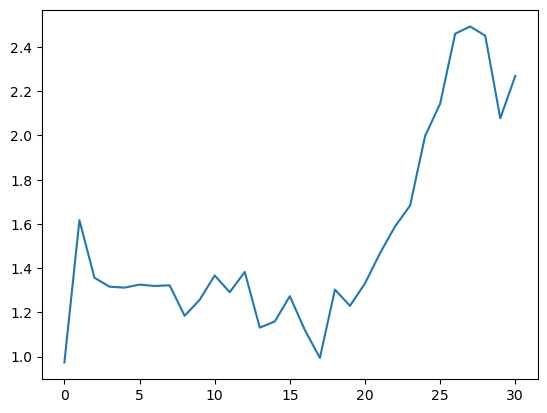

In [674]:
# 換倉日
reb_date = df_select_m['資料日'].unique()

# 計算投組每月報酬
portfolio_return = []
for i in range(len(reb_date)):
    reb_ticker_list = df_select_m[df_select_m['資料日'] == reb_date[i]]['證券名稱'].values
    mean_return = np.mean(monthly_returns[reb_ticker_list].loc[reb_date[i] + MonthEnd(n=0)])
    portfolio_return.append(mean_return)

# 計算投組累積報酬
portfolio_return = np.array(portfolio_return) + 1
portfolio_cumulative_return = portfolio_return.cumprod()

# 累積報酬圖
fig = 
plt.plot(portfolio_cumulative_return)

### 課堂實作練習:

  - 將`['股利殖利率-TSE']` 排序，先提除99百分位數以上的資料後，選擇最高的前50名，組成投資組合。
  - 計算每個月的報酬率，並且計算出累積報酬率。

# 4.0 績效評量

In [424]:

class Stats():
    @staticmethod
    def check_series(values):
        """檢查 input series 是否有日期 index, 並轉換為 float

        Args:
            values (pd.Series): pd.Series with datetime index

        Raises:
            TypeError: 如果不是 pd.Series 則 raise TypeError
            TypeError: 如果 index 不是 datetime 則 raise TypeError

        Returns:
            values: 轉換為 float 的 pd.Series
        """
        if not isinstance(values, pd.Series):
            raise TypeError("values must be a pandas Series")
        # check if values have a datetime index
        if not isinstance(values.index, pd.DatetimeIndex):
            raise TypeError("values must have a datetime index")
        # convert values to float
        values = values.astype(float)
        return values

    @staticmethod
    def drawdown(values):
        """計算 drawdown

        Args:
            values (pd.Series): 應為 投組價值 的 pd.Series

        Returns:
            df: 包含 drawdown, maximum_drawdown 的 pd.DataFrame
        """
        values = Stats.check_series(values)
        df = pd.DataFrame(values.copy())
        df.reset_index(inplace=True)
        name = values.name
        df.columns = ["date", name]

        df["drawdown"] = 1 - df[name] / df[name].cummax()
        df["maximum_drawdown"] = df["drawdown"].cummax()

        return df

    @staticmethod
    def drawdown_detail(values, threshold= 0.1) :
        """取得 drawdown 的詳細資訊，包含開始日期、結束日期、最大回撤、回撤日期、回撤天數、回復天數、總天數

        Args:
            values (pd.Series): 應為 投組價值 的 pd.Series
            threshold (float, optional): 忽略小於 threshold 的 drawdown 資料. Defaults to 0.1.

        Returns:
            pd.DataFrame: 包含開始日期、結束日期、最大回撤、回撤日期、回撤天數、回復天數、總天數 的 pd.DataFrame
        """
        values = Stats.check_series(values)
        df = Stats.drawdown(values)

        df["sign"] = np.where(df["drawdown"] > 0, 1, 0)
        df["sign"] = np.where(df["sign"] != df["sign"].shift(1), 1, 0)
        df["cumsum"] = df["sign"].cumsum()

        df_drawdown = pd.DataFrame([])
        df_drawdown["start_date"] = df.groupby("cumsum")["date"].head(1).values
        df_drawdown["end_date"] = df.groupby("cumsum")["date"].tail(1).values
        df_drawdown["drawdown"] = df.groupby("cumsum")["drawdown"].max().values
        df_drawdown = df_drawdown.dropna()
        df_drawdown["drawdown_date"] = df.loc[
            df.groupby("cumsum")["drawdown"].idxmax().dropna()
        ]["date"].values

        df_drawdown.sort_values("drawdown", ascending=False, inplace=True)
        df_drawdown["days_to_drawdown"] = (
            df_drawdown["drawdown_date"] - df_drawdown["start_date"]
        ).dt.days
        df_drawdown["days_to_recover"] = (
            df_drawdown["end_date"] - df_drawdown["drawdown_date"]
        ).dt.days
        df_drawdown["total_days"] = (
            df_drawdown["end_date"] - df_drawdown["start_date"]
        ).dt.days
        df_drawdown = df_drawdown[(df_drawdown["drawdown"] > threshold)].copy()
        df_drawdown.reset_index(drop=True, inplace=True)
        return df_drawdown

    @staticmethod
    def monthly_return(values, pivot = False):
        """計算月報酬率，若 pivot=True 則回傳 pivot table

        Args:
            values (pd.Series): 應為 投組價值 的 pd.Series
            pivot (bool, optional): 是否回傳 pivot table. Defaults to False.

        Returns:
            pd.DataFrame: 月報酬的 pd.DataFrame
        """
        values = Stats.check_series(values)
        df = pd.DataFrame(values.copy())
        df.reset_index(inplace=True)
        name = values.name
        df.columns = ["date", name]
        df["month"] = df["date"].dt.month
        df["year"] = df["date"].dt.year

        df_monthly_return = df.groupby(["year", "month"])[name].count().reset_index()
        df_monthly_return.columns = ["year", "month", "count"]
        df_monthly_return["start_value"] = (
            df.groupby(["year", "month"])[name].head(1).reset_index(drop=True)
        )
        df_monthly_return["end_value"] = (
            df.groupby(["year", "month"])[name].tail(1).reset_index(drop=True)
        )
        df_monthly_return["return"] = df_monthly_return["end_value"].pct_change()
        # mask where return is not na, fill return with start_value / end_value
        df_monthly_return["return"] = df_monthly_return["return"].mask(
            df_monthly_return["return"].isna(),
            df_monthly_return["end_value"] / df_monthly_return["start_value"] - 1,
        )
        if pivot == False:
            return df_monthly_return
        else:
            return df_monthly_return.pivot(
                index="year", columns="month", values="return"
            )

    @staticmethod
    def yearly_return(values):
        """計算年報酬率

        Args:
            values (pd.Series): 應為 投組價值 的 pd.Series

        Returns:
            pd.DataFrame: 年報酬的 pd.DataFrame
        """
        values = Stats.check_series(values)
        df = pd.DataFrame(values.copy())
        df.reset_index(inplace=True)
        name = values.name
        df.columns = ["date", name]
        df["year"] = df["date"].dt.year

        df_yearly_return = df.groupby(["year"])[name].count().reset_index()
        df_yearly_return.columns = ["year", "count"]
        df_yearly_return["start_value"] = (
            df.groupby(["year"])[name].head(1).reset_index(drop=True)
        )
        df_yearly_return["end_value"] = (
            df.groupby(["year"])[name].tail(1).reset_index(drop=True)
        )
        df_yearly_return["return"] = df_yearly_return["end_value"].pct_change()
        # mask where return is not na, fill return with start_value / end_value
        df_yearly_return["return"] = df_yearly_return["return"].mask(
            df_yearly_return["return"].isna(),
            df_yearly_return["end_value"] / df_yearly_return["start_value"] - 1,
        )
        return df_yearly_return

    @staticmethod
    def alpha(values, benchmark, win_rate=False):
        """依照 投組價值 與 Benchmark 計算 alpha, 包含月報酬、年報酬，若 win_rate=True 則包含月度勝率

        Args:
            values (pd.Series): 應為 投組價值 的 pd.Series
            benchmark (pd.Series): 應為 Benchmark 的 pd.Series
            win_rate (bool, optional): 是否回傳 月度勝率欄位. Defaults to False.

        Returns:
            pd.DataFrame: 年月報酬alpha 的 pd.DataFrame
        """
        values = Stats.check_series(values)
        benchmark = Stats.check_series(benchmark)

        # get only the intersection of values and benchmark
        values = values.loc[values.index.intersection(benchmark.index)]
        benchmark = benchmark.loc[benchmark.index.intersection(values.index)]

        pivot_values = Stats.monthly_return(values, pivot=True)
        pivot_benchmark = Stats.monthly_return(benchmark, pivot=True)

        df_alpha = pivot_values - pivot_benchmark

        yearly_return_values = Stats.yearly_return(values)
        yearly_return_benchmark = Stats.yearly_return(benchmark)

        df_yearly_alpha = pd.merge(
            yearly_return_values,
            yearly_return_benchmark,
            on="year",
            suffixes=("_portfolio", "_benchmark"),
        )
        df_yearly_alpha["return_portfolio"] = df_yearly_alpha[
            "return_portfolio"
        ].fillna(0)
        df_yearly_alpha["return_benchmark"] = df_yearly_alpha[
            "return_benchmark"
        ].fillna(0)
        df_yearly_alpha["alpha"] = (
            df_yearly_alpha["return_portfolio"] - df_yearly_alpha["return_benchmark"]
        )
        if win_rate:
            # add a column for the ratio how many months are positive
            df_alpha["win_rate"] = df_alpha[df_alpha > 0].count(
                axis=1
            ) / df_alpha.count(axis=1)

        df_alpha["year"] = df_yearly_alpha["alpha"].values

        return df_alpha

    @staticmethod
    def return_stat(values, benchmark = None, days_of_year=252):
        """計算報酬率相關統計量，包含: 總報酬、幾何平均報酬、算術平均報酬、標準差、夏普比率、最大回撤、勝率(報酬>0)

        Args:
            values (pd.Series): 應為 投組價值 的 pd.Series
            benchmark (pd.Series, optional): 應為 Benchmark 的 pd.Series. Defaults to None.
            days_of_year (int, optional): 年化因子. Defaults to 252.

        Returns:
            pd.Series | pd.DataFrame: 若 benchmark=None 則回傳 pd.Series, 否則回傳 pd.DataFrame
        """
        values = Stats.check_series(values)
        return_series = values.pct_change().dropna()
        if benchmark is not None:
            # 若有 benchmark，則取得兩者交集，並計算 投組 與 benchmark 的統計量
            benchmark = Stats.check_series(benchmark)
            values = values.loc[values.index.intersection(benchmark.index)]
            benchmark = benchmark.loc[benchmark.index.intersection(values.index)]

            stats = Stats.return_stat(values, days_of_year=days_of_year)
            stats_benchmark = Stats.return_stat(
                benchmark, days_of_year=days_of_year
            ).rename("Benchmark")

            stats = pd.concat([stats, stats_benchmark], axis=1)
            stats.columns = ["Portfolio", "Benchmark"]
            return stats

        equity = (return_series + 1).cumprod()
        geo_return_annual = (equity.iloc[-1]) ** (days_of_year / len(equity)) - 1
        arith_return_annual = (return_series.mean() + 1) ** (days_of_year) - 1
        # 投組勝率
        hit_rate = sum(return_series > 0) / len(return_series)
        std_annual = return_series.std() * np.sqrt(days_of_year)

        sharpe_annual = geo_return_annual / std_annual

        # 計算MDD
        drawdown = equity.cummax() - equity
        d = drawdown / (drawdown + equity)
        mdd = d.max()

        # 周轉率
        result = pd.Series(
            [
                equity.iloc[-1],
                geo_return_annual,
                arith_return_annual,
                std_annual,
                sharpe_annual,
                mdd,
                hit_rate,
            ]
        )
        result.index = [
            "Total Return",
            "Geometric Mean Return",
            "Arithmetic Mean Return",
            "Standard Deviation",
            "Sharpe Ratios",
            "mdd",
            "Hit Rate",
        ]
        return result.round(4)


年月日
2019-01-30   23.776
2019-01-29   23.617
2019-01-28   23.553
2019-01-25   23.298
2019-01-24   23.171
              ...  
2023-08-17   35.650
2023-08-18   35.150
2023-08-21   35.400
2023-08-22   35.400
2023-08-23   35.300
Name: 收盤價(元), Length: 1196, dtype: float32

In [434]:
Stats.monthly_return(df[df['證券代碼'] == '1101 台泥']['收盤價(元)'])

,year,month,count,start_value,end_value,return
0,2019,1,21,22.598,23.776,0.052
1,2019,2,13,23.967,24.444,0.028
2,2019,3,20,24.317,26.258,0.074
3,2019,4,20,26.322,26.736,0.018
4,2019,5,22,26.863,27.309,0.021
5,2019,6,19,27.627,29.314,0.073
6,2019,7,23,29.378,28.455,-0.029
7,2019,8,21,28.041,28.323,-0.005
8,2019,9,19,28.176,29.207,0.031
9,2019,10,21,29.207,29.797,0.020
